In [259]:
import numpy as np
import pandas as pd
import os
import warnings
warnings.filterwarnings('ignore')

In [260]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
import matplotlib.pyplot as plt

In [261]:
from pathlib import Path

In [262]:
train=pd.read_csv('D:/Hackathon/train.csv')
test=pd.read_csv('D:/Hackathon/test.csv')

In [330]:
train

,file_id,label
0,190,1
1,190,1
2,191,1
3,192,1
4,193,1
...,...,...
586,585,0
587,586,0
588,587,0
589,588,0


In [263]:
import matplotlib.pyplot as plt
import seaborn as sns
import cv2

train_img=[]
for img in train['file_id']:
    img_path='D:/Hackathon/train/Mask_Train/'+ str(img) + '.jpg'
    file=Path(img_path)
    if file.exists():
        img=cv2.imread(img_path)
        img=cv2.resize(img,(224,224))
        train_img.append(img)
    else:
        img_path='D:/Hackathon/train/No Mask_Train/'+ str(img) + '.jpg'
        img=cv2.imread(img_path)
        img=cv2.resize(img,(224,224))
        train_img.append(img)
    

train_y=train['label'].values

In [404]:
train_x=np.array(train_x)

In [265]:
train_x.shape

(591, 224, 224, 3)

In [266]:
IMAGE_SIZE = [224, 224]
vgg19 = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [267]:
# don't train existing weights
for layer in vgg19.layers:
    layer.trainable = False

In [268]:
from glob import glob
folders = glob('D:/Hackathon/train/*')

In [269]:
folders

['D:/Hackathon/train\\Mask_Train', 'D:/Hackathon/train\\No Mask_Train']

In [270]:
x = Flatten()(vgg19.output)

In [271]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=vgg19.input, outputs=prediction)

In [272]:
model.summary()

Model: "model_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0  

In [273]:
train_y = np.asarray(train_y).astype('float32').reshape((-1,1))

In [274]:
train_y

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],

In [275]:
from tensorflow.keras.utils import to_categorical
train_y=to_categorical(train_y)

In [276]:
train_y

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [277]:
x_train.shape

(472, 224, 224, 3)

In [417]:
from sklearn.utils import shuffle
train_x,train_y=shuffle(train_x,train_y,random_state=5)

In [418]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(train_x,train_y,test_size=0.2,random_state=12)

In [280]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [281]:
epochs=50

from keras.callbacks import ReduceLROnPlateau
red_lr= ReduceLROnPlateau(monitor='val_acc',patience=3,verbose=1,factor=0.1)

In [282]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)

In [283]:
model.compile(optimizer=Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

In [284]:
model.summary()

Model: "model_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0  

In [285]:
History = model.fit_generator(datagen.flow(x_train,y_train, batch_size=128),
                              epochs = epochs, validation_data = (x_test,y_test),
                              verbose = 1, steps_per_epoch=x_train.shape[0] // 128)

Epoch 1/50
3/3 [==============================] - 61s 22s/step - loss: 13.5434 - accuracy: 0.5749 - val_loss: 17.7725 - val_accuracy: 0.8319
Epoch 2/50
3/3 [==============================] - 54s 21s/step - loss: 24.9524 - accuracy: 0.7644 - val_loss: 8.1174 - val_accuracy: 0.8319
Epoch 3/50
3/3 [==============================] - 59s 21s/step - loss: 4.1095 - accuracy: 0.8480 - val_loss: 7.6287 - val_accuracy: 0.6218
Epoch 4/50
3/3 [==============================] - 59s 21s/step - loss: 9.9520 - accuracy: 0.6253 - val_loss: 3.1480 - val_accuracy: 0.8824
Epoch 5/50
3/3 [==============================] - 54s 19s/step - loss: 3.1593 - accuracy: 0.8749 - val_loss: 5.7707 - val_accuracy: 0.8739
Epoch 6/50
3/3 [==============================] - 54s 19s/step - loss: 3.7452 - accuracy: 0.8672 - val_loss: 4.7205 - val_accuracy: 0.8992
Epoch 7/50
3/3 [==============================] - 54s 22s/step - loss: 4.0569 - accuracy: 0.8657 - val_loss: 2.9990 - val_accuracy: 0.8655
Epoch 8/50
3/3 [========

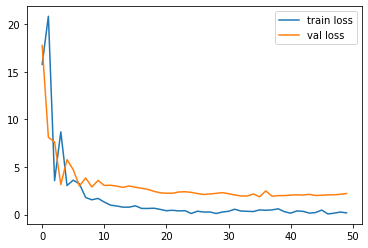

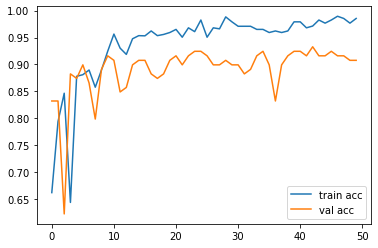

<Figure size 432x288 with 0 Axes>

In [286]:
# plot the loss
plt.plot(History.history['loss'], label='train loss')
plt.plot(History.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(History.history['accuracy'], label='train acc')
plt.plot(History.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [287]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('Mask_detector_vgg19.h5')

In [288]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [289]:
model=load_model('Mask_detector_vgg19.h5')

In [419]:
preds=model.predict(x_test)

In [420]:
predictions=np.argmax(preds,axis=1)

In [421]:
correct_class=[]
incorrect_class=[]
i=0
for i in range(len(y_test)):
    if(np.argmax(y_test[i])==predictions[i]):
        correct_class.append(i)
    if(len(correct_class)==8):
        break

In [422]:
i=0
for i in range(len(y_test)):
    
    if (np.argmax(y_test[i])!=predictions[i]):
        
        incorrect_class.append(i)
    if (len(incorrect_class)==8):
        break

In [423]:
categories=["No Mask","Mask"]

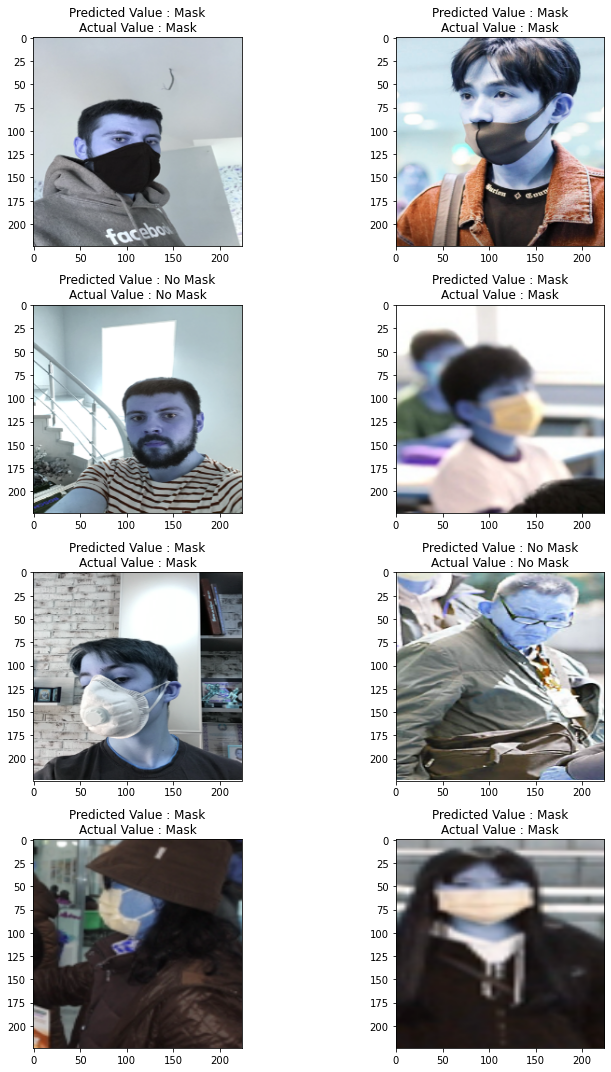

In [424]:
count=0
fig,ax=plt.subplots(4,2)
fig.set_size_inches(15,15)
for i in range (4):
    for j in range (2):
        ax[i,j].imshow(x_test[correct_class[count]])
        ax[i,j].set_title("Predicted Value : "+ categories[predictions[correct_class[count]]] +"\n"+"Actual Value : "+ categories[np.argmax(y_test[correct_class[count]])])
        plt.tight_layout()
        count+=1

In [637]:
img_path='D:/Hackathon/test data/37.jpg'

In [641]:
img=cv2.imread(img_path)
img=cv2.resize(img,(224,224))
img=img/255

In [642]:
img=img.reshape(-1,224,224,3)

In [643]:
img.shape

(1, 224, 224, 3)

In [644]:
x=np.array(img)

In [645]:
a=np.argmax(model.predict(x), axis=1)

In [646]:
if a==0:
    print("Please wear the mask")
else:
    print("Thank you for wearing the mask")

Please wear the mask
